#-[0]. {Optional} Load google drive for csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/My Drive/URJC/Cours/'Reconocimiento patrones'

!ls

/content/drive/My Drive/URJC/Cours/Reconocimiento patrones
'Cour 1'	     Datasets
'Cour 10 (21oct)'   'Guía de repaso (Respuestas).gdoc'
'cour 12 (28 oct)'   ml_map.png
'Cour 2'	     notas-reco-patrones.pdf
'cour 3 (30sept)'   '[Perso] de Guía de repaso (Respuestas).gdoc'
'cour 4'	     Reto1_2021.pdf
'cour 5 (4oct)'      Reto2_2021.pdf
'cour 6 (7oct)'


#-[1]. Importing package needed


In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb

%matplotlib inline
from matplotlib import pyplot as plt

# seed = 1234 #<- random generator seed (0 to get randomness)
seed = 0

#-[2]. Load data from CSV : X_all_set (features) and Y_all_set (labels)

In [3]:
X_all_set = pd.read_csv('Datasets/reto3_trainX.csv')
Y_all_set = pd.read_csv('Datasets/reto3_trainY.csv')

print("Features shape : " + str(X_all_set.shape))
print("Label shape : " + str(Y_all_set.shape))

Features shape : (116202, 54)
Label shape : (116202, 1)


In [4]:
pd.set_option("display.max_columns", None)
X_all_set.head()

,altitud,azimut,inclinacion,DH_agua,DV_agua,DH_camino,sombra_9am,sombra_12pm,sombra_3pm,DH_fuego,reserva_1,reserva_2,reserva_3,Reserva_4,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40
0,3351,354,19,450,95,1064,185,203,153,711,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2995,84,7,481,30,5154,231,227,129,5488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2884,72,25,210,-45,466,239,183,60,2123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3139,76,11,301,58,1368,234,220,117,3282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3018,312,17,30,10,1719,172,225,193,1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_all_set.head()

,tipo_bosque
0,1
1,2
2,2
3,1
4,1


In [6]:
names = X_all_set.columns
for i in names:
  print(i, end='   ')

altitud   azimut   inclinacion   DH_agua   DV_agua   DH_camino   sombra_9am   sombra_12pm   sombra_3pm   DH_fuego   reserva_1   reserva_2   reserva_3   Reserva_4   t1   t2   t3   t4   t5   t6   t7   t8   t9   t10   t11   t12   t13   t14   t15   t16   t17   t18   t19   t20   t21   t22   t23   t24   t25   t26   t27   t28   t29   t30   t31   t32   t33   t34   t35   t36   t37   t38   t39   t40   

In [7]:
Y_all_set.value_counts()

tipo_bosque
2              56660
1              42368
3               7151
7               4102
6               3473
5               1899
4                549
dtype: int64

#-[3]. Split X_all_set and y_all_set into TRAIN and TEST in a single Stratified split

### Parameters

X is the dataframe with examples (rows) and attributes (columns)

Y is the dataframe with labels

test_size is the percentage of X separated; default is 0.2

random_state is a seed for pseudorandom generation (0 to get randomness)

### Return

X_train, Y_train = dataframes of (1-test_size)% of the X and Y

X_test, Y_test = dataframes of test_size% of the X and Y

In [8]:
def single_stratified_split(X,Y,test_size=.2, random_state=0):
    from sklearn.model_selection import StratifiedShuffleSplit
    if random_state != 0:
      splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    else:
      splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size)
    split_ix = splitter.split(X,Y)
    for train_ix, test_ix in split_ix:
        X_train = X.loc[train_ix].reset_index(drop=True)
        Y_train = Y.loc[train_ix].reset_index(drop=True)
        X_test  = X.loc[test_ix].reset_index(drop=True)
        Y_test  = Y.loc[test_ix].reset_index(drop=True)
    return X_train, Y_train, X_test, Y_test

### Spliting the dataset

In [9]:
valid_size = 0.2
X_train, Y_train, X_valid, Y_valid = \
   single_stratified_split( X_all_set, Y_all_set, test_size=valid_size, random_state=seed)

#-[4]. Fit a scaler to [0,1]

In [10]:
X_train.head()

,altitud,azimut,inclinacion,DH_agua,DV_agua,DH_camino,sombra_9am,sombra_12pm,sombra_3pm,DH_fuego,reserva_1,reserva_2,reserva_3,Reserva_4,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40
0,3037,270,8,553,39,5922,199,243,183,4384,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3060,91,10,618,42,1570,235,225,120,2477,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2567,40,7,60,0,1768,221,224,138,1889,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2793,23,21,85,27,2371,203,191,117,767,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2819,167,6,210,9,2036,225,242,151,2363,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
print("Features train set shape : " + str(X_train.shape))

Features train set shape : (92961, 54)


In [12]:
a = 0
for i in X_train['altitud']:
  print(i)
  a += 1
  if a >= 10:
    break

3037
3060
2567
2793
2819
2908
2975
2820
2998
3197


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
print("Features train set shape (scaled) : " + str(X_train_scale.shape))

Features train set shape (scaled) : (92961, 54)


In [14]:
print(X_train_scale)

[[0.58938408 0.75       0.12698413 ... 0.         0.         0.        ]
 [0.60090135 0.25277778 0.15873016 ... 0.         0.         0.        ]
 [0.35403105 0.11111111 0.11111111 ... 0.         0.         0.        ]
 ...
 [0.34051077 0.39722222 0.25396825 ... 0.         0.         0.        ]
 [0.72408613 0.82777778 0.22222222 ... 0.         1.         0.        ]
 [0.5317977  0.13333333 0.0952381  ... 0.         0.         0.        ]]


Checking if the scaling as been well done


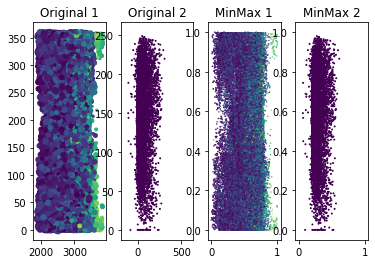

In [15]:
# Verify scale is good

fig, axes = plt.subplots(1,4)
axes[0].scatter(X_train['altitud'], X_train['azimut'], X_train['inclinacion'], X_train['DH_agua'])
axes[0].set_title("Original 1")
axes[1].scatter(X_train['DV_agua'], X_train['sombra_3pm'], X_train['Reserva_4'], X_train['reserva_2'])
axes[1].set_title("Original 2")
axes[2].scatter(X_train_scale[:, 0], X_train_scale[:, 1], X_train_scale[:, 2], X_train_scale[:, 3])
axes[2].set_title("MinMax 1")
axes[3].scatter(X_train_scale[:, 4], X_train_scale[:, 8], X_train_scale[:, 13], X_train_scale[:, 11])
axes[3].set_title("MinMax 2")
print("Checking if the scaling as been well done")
plt.show()

#-[5]. Reduction with PCA (NOT USED)

In [16]:
# We did not use PCA for the final training, that's why X_Proy is never used

from sklearn.decomposition import PCA

n_components = 20
# n_components = 0.5 
if n_components <= X_train_scale.shape[1]:
    pca = PCA(n_components = n_components)
    pca.fit(X_train_scale)
    X_proy = pca.transform(X_train_scale)
else:
    print("ERROR: the number of princial components has to be less or equal than data dimension !")

In [17]:
print(X_proy)

[[ 0.99994131 -0.44710468  0.4131561  ...  0.11026151 -0.00743703
   0.03953452]
 [ 0.93620257 -0.37298913  0.30274447 ...  0.20101119 -0.03755486
   0.14115223]
 [-0.6793199  -0.12793233 -0.0778922  ... -0.04156608 -0.02548931
  -0.09493508]
 ...
 [-0.74722731 -0.08304707  0.03966934 ...  0.10522237  0.70603754
   0.24218344]
 [-0.68514555 -0.18826477  0.06786521 ... -0.14680158 -0.00733655
  -0.28709752]
 [ 1.02809789 -0.44960018  0.21924379 ... -0.14409863 -0.02028014
  -0.01910554]]


In [18]:
num_of_pc = len(pca.singular_values_)

strTitle = '\n First %d principal components' %(num_of_pc)
print(strTitle)
print(pca.components_.T)
strTitle = '\n First %d singular values ' %(num_of_pc)
print(strTitle)
print(pca.singular_values_.T)
strTitle = '\n Explained Variance Ratio'
print(strTitle)
print(pca.explained_variance_ratio_.T)
strTitle = '\n Accumulated Explained Variance Ratio'
print(strTitle)
print(np.cumsum(pca.explained_variance_ratio_.T))


 First 20 principal components
[[ 1.15001140e-02 -1.60187638e-01 -1.54415264e-01 ...  4.92214343e-02
   1.09476325e-03 -1.76175085e-02]
 [-6.03832092e-02  1.18668476e-01  3.04023161e-01 ...  1.24759285e-03
  -1.68358530e-02  6.44342904e-02]
 [-3.20676111e-02  4.66263841e-02  1.08698427e-01 ... -4.94448100e-02
   1.34625850e-01  1.04573840e-01]
 ...
 [-6.00122879e-05  7.47217295e-03 -3.27886498e-02 ... -5.23425706e-02
  -2.89412641e-02  2.07381431e-01]
 [-9.88497635e-04  1.84858091e-03 -2.50860817e-02 ... -2.38100572e-01
  -4.85099719e-02 -1.82220108e-01]
 [ 2.15096790e-03  9.65821656e-03 -1.80548028e-02 ...  1.90832857e-01
   3.73829552e-03  1.50657307e-01]]

 First 20 singular values 
[223.74165867 118.36596345 107.1961151  102.43303225  91.47744051
  89.30916428  83.35429251  75.66598098  71.08732708  68.59165312
  61.58631345  61.33014681  56.36230572  55.50394051  52.23817957
  50.58267831  48.73584846  47.53771535  45.55176112  44.29463871]

 Explained Variance Ratio
[0.29855156 

#-[6]. Learning with GradientBoosting ensemble

### Taking 10-20 min with google colaboratory

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

max_depth = 20
n_estimators = 100
learning_rate= 0.2

gb_clf = GradientBoostingClassifier(max_depth=max_depth,        \
                                    n_estimators=n_estimators,  \
                                    learning_rate=learning_rate)

gb_clf.fit(X_train_scale, Y_train)
# gb_clf.fit(X_proy, Y_train) if you want to use PCA

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.2, max_depth=20)

#-[7]. Testing the model with test dataset

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Y_pred = gb_clf.predict(gb_clf.fit(scaler.transform(X_valid))) if you want to use PCA
Y_pred = gb_clf.predict(scaler.transform(X_valid))
cm = confusion_matrix(Y_valid, Y_pred)
cr = classification_report(Y_valid, Y_pred)

accuracy = accuracy_score(Y_valid, Y_pred)

print("accuracy = ",accuracy)
print()
print(cm)
print()
print(cr)

accuracy =  0.9339099006066864

[[ 7889   556     2     0     4     1    22]
 [  378 10846    28     2    39    31     8]
 [    0    39  1327    23     6    35     0]
 [    0     1    24    76     0     9     0]
 [    5   107     2     0   262     4     0]
 [    0    48    81     6     0   560     0]
 [   67     8     0     0     0     0   745]]

              precision    recall  f1-score   support

           1       0.95      0.93      0.94      8474
           2       0.93      0.96      0.95     11332
           3       0.91      0.93      0.92      1430
           4       0.71      0.69      0.70       110
           5       0.84      0.69      0.76       380
           6       0.88      0.81      0.84       695
           7       0.96      0.91      0.93       820

    accuracy                           0.93     23241
   macro avg       0.88      0.84      0.86     23241
weighted avg       0.93      0.93      0.93     23241



#-[8]. Generating "reto3_Ypred.csv" with the model

### Loading the dataset to be predicted

In [21]:
X_test_set = pd.read_csv('Datasets/reto3_testX.csv')

print("Loaded !")

Loaded !


### Scaling X_test_set dataset

In [22]:
X_test_set_scale = scaler.transform(X_test_set)
#X_test_set_scale = gb_clf.fit(scaler.transform(X_test_set)) if you want to use PCA

Checking if the scaling as been well done


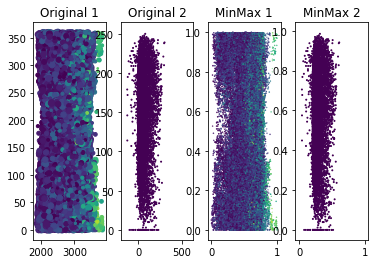

In [23]:
# Verify scale is good

fig, axes = plt.subplots(1,4)
axes[0].scatter(X_test_set['altitud'], X_test_set['azimut'], X_test_set['inclinacion'], X_test_set['DH_agua'])
axes[0].set_title("Original 1")
axes[1].scatter(X_test_set['DV_agua'], X_test_set['sombra_3pm'], X_test_set['Reserva_4'], X_test_set['reserva_2'])
axes[1].set_title("Original 2")
axes[2].scatter(X_test_set_scale[:, 0], X_test_set_scale[:, 1], X_test_set_scale[:, 2], X_test_set_scale[:, 3])
axes[2].set_title("MinMax 1")
axes[3].scatter(X_test_set_scale[:, 4], X_test_set_scale[:, 8], X_test_set_scale[:, 13], X_test_set_scale[:, 11])
axes[3].set_title("MinMax 2")
print("Checking if the scaling as been well done")
plt.show()

### Predict the values

In [24]:
Y_pred_final = gb_clf.predict(X_test_set_scale)

### Generating the reto3_Ypred.csv file

In [25]:
Y_pred_final = np.array(Y_pred_final)
# --- Save prediction in .csv file.
np.savetxt('Datasets/reto3_Ypred.csv', Y_pred_final, fmt='%i', delimiter=',')

#-[9]. Saving model with pickle

In [26]:
import pickle
from datetime import datetime

now = datetime.now()
date = now.strftime("%d-%m-%H:%M:%S")

filename = "Model_"
path_file = filename + date + ".sav"

pickle.dump(gb_clf, open(path_file, "wb"))